# Project: Optimal traffic routes prediction for shuttle service in Hyderabad's IT Corridor

In [131]:
import numpy as np # It is used for Arthematic operation
import pandas as pd # It is used for modification of tabuler dataset
import matplotlib.pyplot as plt # It is used for data visualization
import seaborn as sns # It is used for adavanced data visualization
import networkx.algorithms.community as nx_comm # It is used for detection of hidden community in graph
import networkx as nx # It is used to study large complex networks represented in form of graphs with nodes and edges

#import sweetviz as sv # It is used for Auto-EDA
#import dtale # It is used for Auto-EDA

plt.style.use("seaborn") # It provide theme to graph

import warnings # to ignore warnings regarding packages
warnings.filterwarnings("ignore")

In [132]:
data = pd.read_csv(r"D:\Project\deployment\dummy excel.csv") # load dataset in excel format
data = data.iloc[:,2:]
data

,Date,Time,Source,query_origin,road,Destination,query_destination,distance(meters),avg_time(minutes)
0,12-09-2022,8:00 AM,Kondapur Bus Stop,"17.4663983,78.3673396",Gachibowli / Miyapur Rd,Dell Bus Stop,"17.4482137,78.3742555",4092,10
1,12-09-2022,8:00 AM,Masjid Banda Bus Stop,"17.465334,78.345367",Botanical Garden Rd,Dell Bus Stop,"17.4482137,78.3742555",5218,14
2,12-09-2022,8:00 AM,Masjid Banda Bus Stop,"17.4599663,78.3381459",Gachibowli Rd/Old Mumbai Hwy,Dell Bus Stop,"17.4482137,78.3742555",7712,14
3,12-09-2022,8:00 AM,Avonpro Opp (KPHB Phase 15),"17.4594751,78.3971116",Bhagyanagar Colony Main Rd and Kukatpally Hous...,Dell Bus Stop,"17.4482137,78.3742555",4057,9
4,12-09-2022,8:00 AM,IIT Bus Stop,"17.4459619,78.3522829",DLF Rd and Mindspace Rd,Dell Bus Stop,"17.4482137,78.3742555",4700,12
...,...,...,...,...,...,...,...,...,...
587,13-09-2022,6:00 PM,Hi-Tech City Bus Stop,"17.4632667,78.3851066",Hitex Road,Winvest Technology,"17.4575479,78.3739122",3192,10
588,13-09-2022,6:00 PM,Sarojini Naidu Nagar,"17.4518857,78.3966938",100 Feet Rd and Hitech City Rd,Winvest Technology,"17.4575479,78.3739122",3526,12
589,13-09-2022,6:00 PM,Kondapur Bus Stop,"17.464986,78.3755794",Hitex Road,Winvest Technology,"17.4575479,78.3739122",2640,9
590,13-09-2022,6:00 PM,Hi-Tech City MMTS,"17.469874, 78.3851136",Kukatpally Housing Board Rd and Hitech City Ma...,Winvest Technology,"17.4575479,78.3739122",5200,14


In [133]:
data.info() # provide information regarding our given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               592 non-null    object
 1   Time               592 non-null    object
 2   Source             592 non-null    object
 3   query_origin       592 non-null    object
 4   road               592 non-null    object
 5   Destination        592 non-null    object
 6   query_destination  592 non-null    object
 7   distance(meters)   592 non-null    int64 
 8   avg_time(minutes)  592 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 41.8+ KB


In [134]:
data["speed_km_hr"] = (data["distance(meters)"] / 1000) / (data["avg_time(minutes)"] / 60) # Feature Extraction 
                                            #(get avg_speed of vechile from using "speed = distance / time" formula. )
data

,Date,Time,Source,query_origin,road,Destination,query_destination,distance(meters),avg_time(minutes),speed_km_hr
0,12-09-2022,8:00 AM,Kondapur Bus Stop,"17.4663983,78.3673396",Gachibowli / Miyapur Rd,Dell Bus Stop,"17.4482137,78.3742555",4092,10,24.552000
1,12-09-2022,8:00 AM,Masjid Banda Bus Stop,"17.465334,78.345367",Botanical Garden Rd,Dell Bus Stop,"17.4482137,78.3742555",5218,14,22.362857
2,12-09-2022,8:00 AM,Masjid Banda Bus Stop,"17.4599663,78.3381459",Gachibowli Rd/Old Mumbai Hwy,Dell Bus Stop,"17.4482137,78.3742555",7712,14,33.051429
3,12-09-2022,8:00 AM,Avonpro Opp (KPHB Phase 15),"17.4594751,78.3971116",Bhagyanagar Colony Main Rd and Kukatpally Hous...,Dell Bus Stop,"17.4482137,78.3742555",4057,9,27.046667
4,12-09-2022,8:00 AM,IIT Bus Stop,"17.4459619,78.3522829",DLF Rd and Mindspace Rd,Dell Bus Stop,"17.4482137,78.3742555",4700,12,23.500000
...,...,...,...,...,...,...,...,...,...,...
587,13-09-2022,6:00 PM,Hi-Tech City Bus Stop,"17.4632667,78.3851066",Hitex Road,Winvest Technology,"17.4575479,78.3739122",3192,10,19.152000
588,13-09-2022,6:00 PM,Sarojini Naidu Nagar,"17.4518857,78.3966938",100 Feet Rd and Hitech City Rd,Winvest Technology,"17.4575479,78.3739122",3526,12,17.630000
589,13-09-2022,6:00 PM,Kondapur Bus Stop,"17.464986,78.3755794",Hitex Road,Winvest Technology,"17.4575479,78.3739122",2640,9,17.600000
590,13-09-2022,6:00 PM,Hi-Tech City MMTS,"17.469874, 78.3851136",Kukatpally Housing Board Rd and Hitech City Ma...,Winvest Technology,"17.4575479,78.3739122",5200,14,22.285714


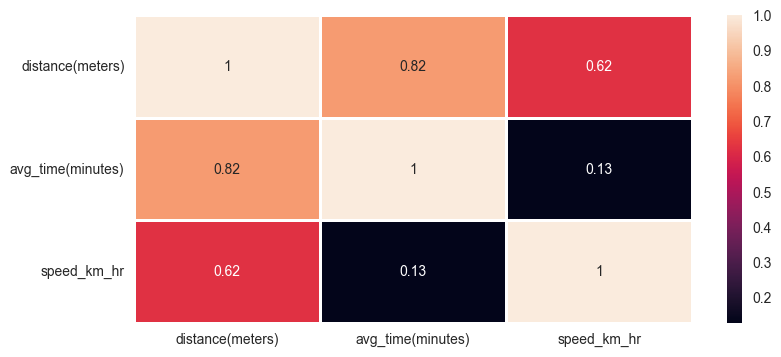

In [135]:
plt.figure(figsize = (9,4)) # check co-relation between numerical variables. here we see speed is indirectly propotional to avg_time
                            # it means if we increase speed of car our time of travel decrease. because both are uncorelated
                            # (corelation <= 0.4)

                            # check co-relation between numerical variables. here we see distance is directly propotional to avg_time
                            # it means if distance increase our time of travel also increase. because both are strongly correlated
                            # (correlation >= 0.8)
sns.heatmap(data.iloc[:,-4:].corr(), annot = True, linewidth = 1)
plt.show()

In [136]:
data = data.iloc[:,[4,5,7,8,9]] # here we only choose those input variables which may be useful for further work.
data

,road,Destination,distance(meters),avg_time(minutes),speed_km_hr
0,Gachibowli / Miyapur Rd,Dell Bus Stop,4092,10,24.552000
1,Botanical Garden Rd,Dell Bus Stop,5218,14,22.362857
2,Gachibowli Rd/Old Mumbai Hwy,Dell Bus Stop,7712,14,33.051429
3,Bhagyanagar Colony Main Rd and Kukatpally Hous...,Dell Bus Stop,4057,9,27.046667
4,DLF Rd and Mindspace Rd,Dell Bus Stop,4700,12,23.500000
...,...,...,...,...,...
587,Hitex Road,Winvest Technology,3192,10,19.152000
588,100 Feet Rd and Hitech City Rd,Winvest Technology,3526,12,17.630000
589,Hitex Road,Winvest Technology,2640,9,17.600000
590,Kukatpally Housing Board Rd and Hitech City Ma...,Winvest Technology,5200,14,22.285714


Graph with 41 nodes and 59 edges


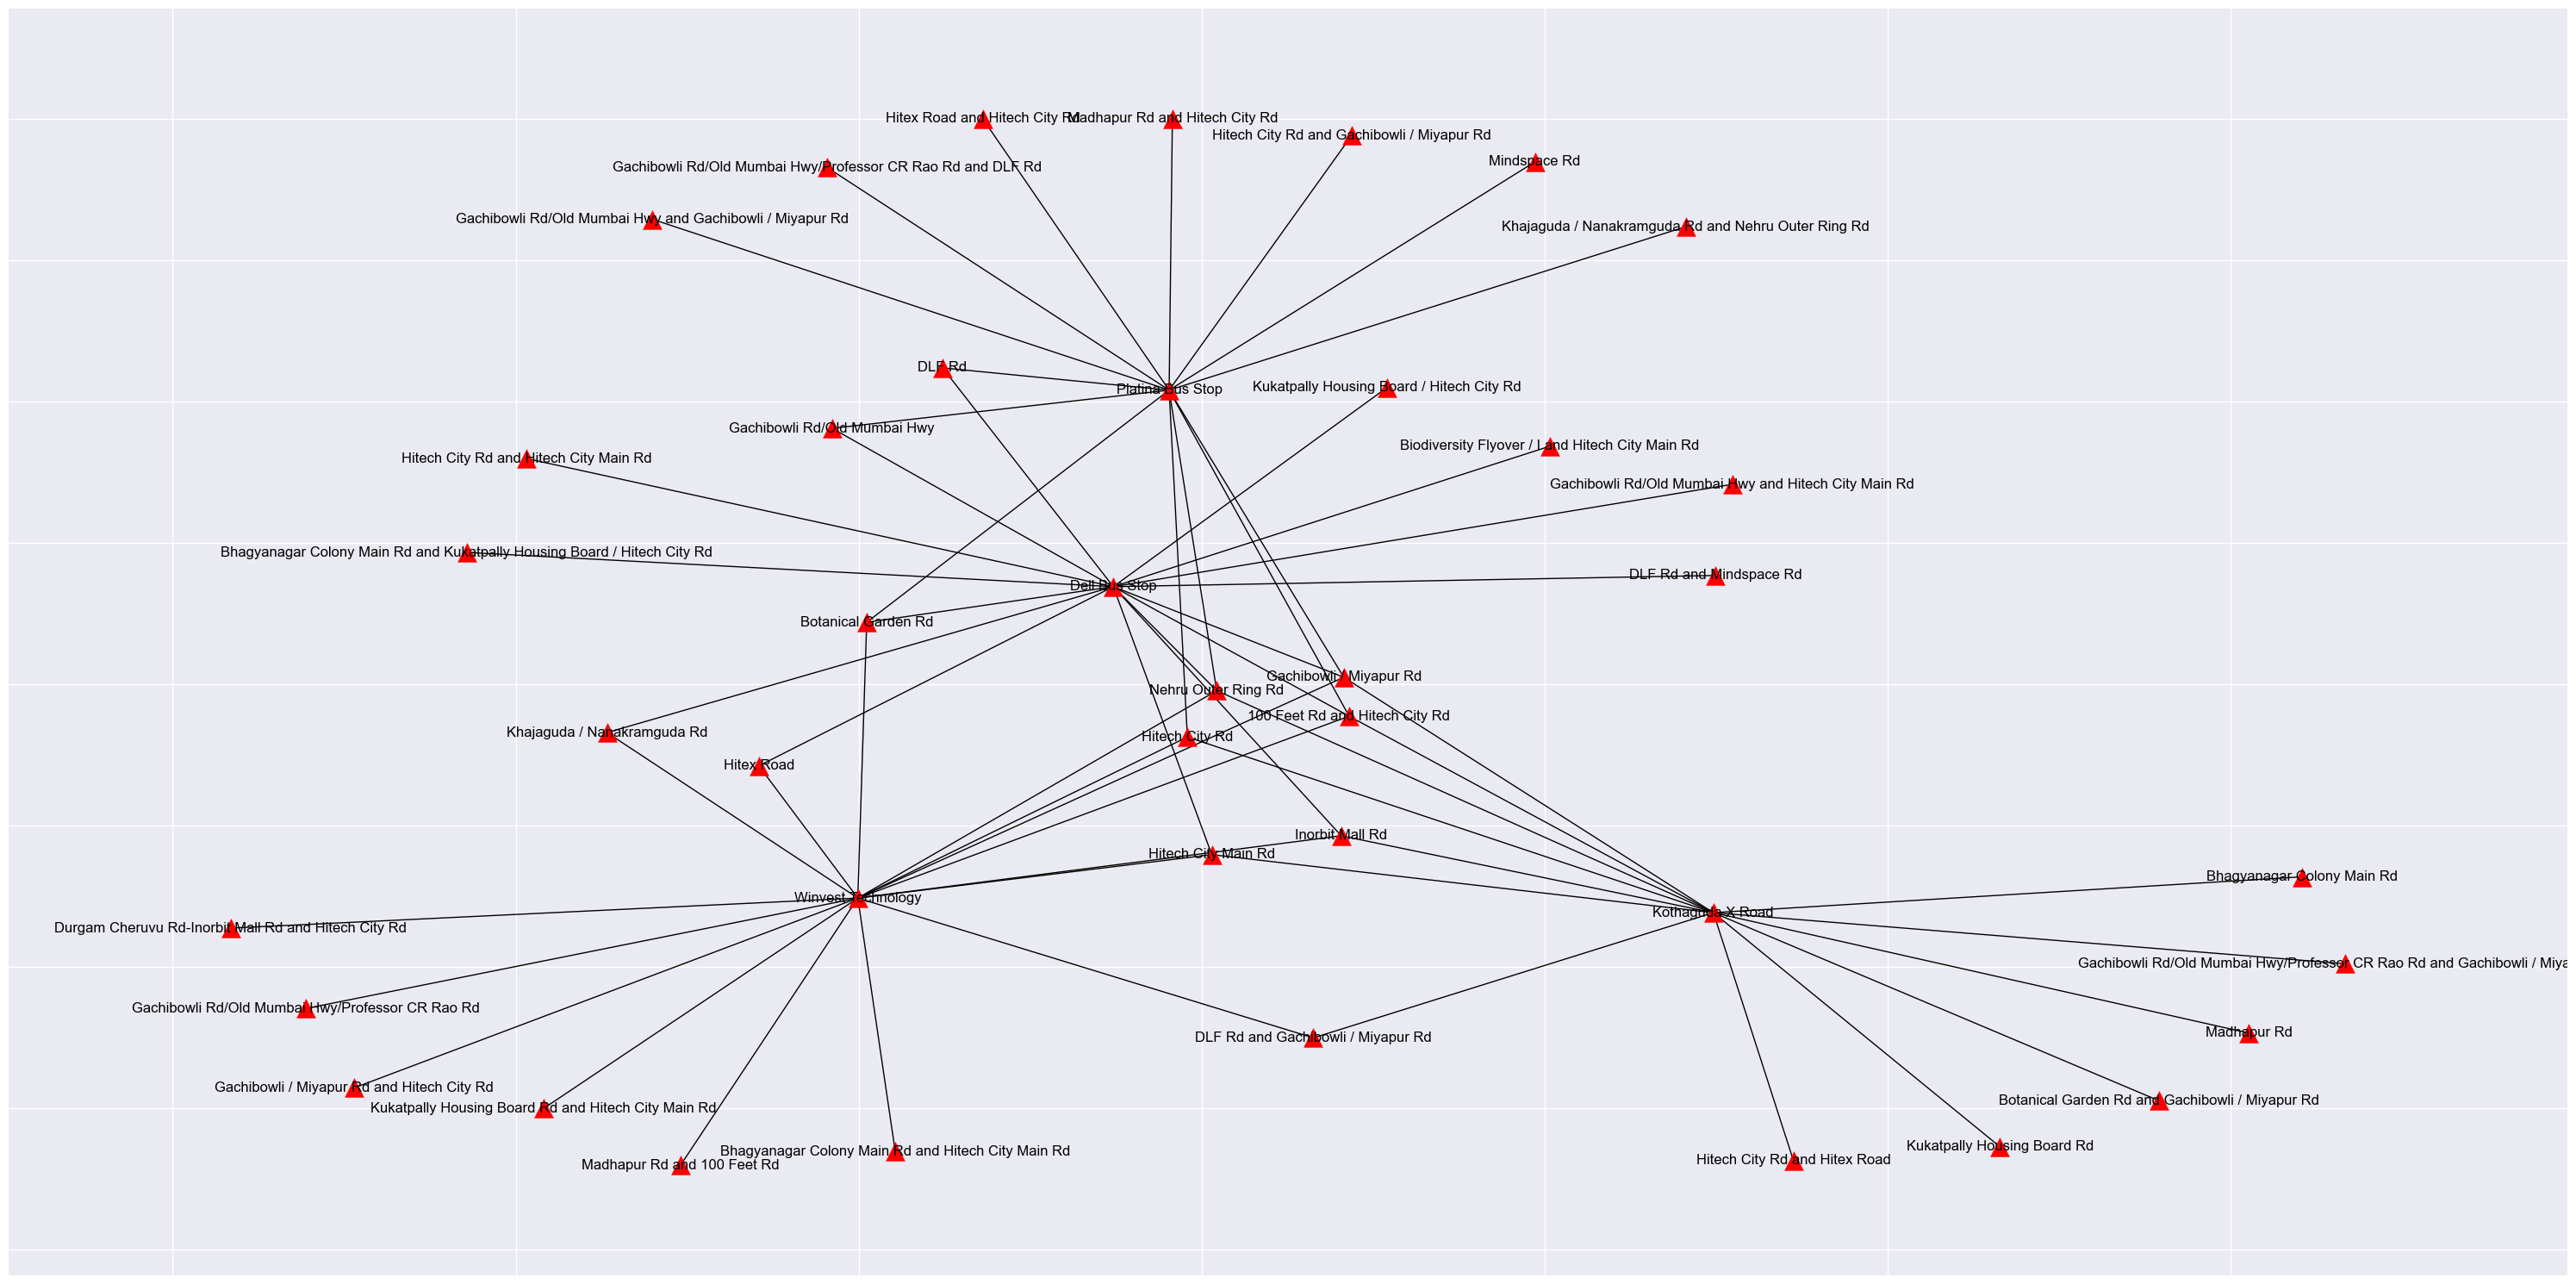

In [137]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination") # here we choose data["road"] as source and 
                                    # data["Destinantion"] as destination point vice-versa as per requirement of client.
print(g)
pos = nx.spring_layout(g) # we choose our graph layout here to make our visulization of graph smooth

plt.figure(figsize = (30,15))

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, node_size = 250, node_color = "red", with_labels=True, node_shape = "^") # here we draw our graph through networkx library

plt.tight_layout() # for making visulaization smooth.
plt.show() # to display obtained graph

## Auto - EDA

Auto - Exploratory Data Analysis is a process where we tend to analyze the dataset and summarize the main characteristics 
of the dataset often using visual methods

## dtale - library

In [138]:
#pip install dtale

In [139]:
#import dtale
#dtale.show(data)

In [140]:
#dtale.show(data).open_browser()

## sweetviz - library

In [141]:
#pip install sweetviz

In [142]:
"""
import sweetviz as sv
eda = sv.analyze(data)
eda.show_html("data.html")

"""

'\nimport sweetviz as sv\neda = sv.analyze(data)\neda.show_html("data.html")\n\n'

## Adjency Matrix

with the help of Adjency Matrix we easily find which node is connected with which node (directed connection) 

In [143]:
all_node_list = []
# we put all unique node from data["road"] and data["Destination"] in a list called all_node_list. for adjency matrix
for i in data["road"].unique():
   all_node_list.append(i)

all_node_list

['Gachibowli / Miyapur Rd',
 'Botanical Garden Rd',
 'Gachibowli Rd/Old Mumbai Hwy',
 'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd',
 'DLF Rd and Mindspace Rd',
 'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd',
 'Inorbit Mall Rd',
 'Hitech City Main Rd',
 'Biodiversity Flyover / I and Hitech City Main Rd',
 'Nehru Outer Ring Rd',
 'Khajaguda / Nanakramguda Rd',
 'Hitech City Rd and Hitech City Main Rd',
 'Kukatpally Housing Board / Hitech City Rd',
 '100 Feet Rd and Hitech City Rd',
 'Hitex Road',
 'Botanical Garden Rd and Gachibowli / Miyapur Rd',
 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd',
 'Bhagyanagar Colony Main Rd',
 'DLF Rd and Gachibowli / Miyapur Rd',
 'Madhapur Rd',
 'Hitech City Rd and Hitex Road',
 'Hitech City Rd',
 'Kukatpally Housing Board Rd',
 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
 'DLF Rd',
 'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
 'Madhapur Rd and Hit

In [144]:
for i in data["Destination"].unique():
    all_node_list.append(i)

In [145]:
adj = nx.adjacency_matrix(g, nodelist = all_node_list)
print(adj)

  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (1, 37)	1
  (1, 39)	1
  (1, 40)	1
  (2, 37)	1
  (2, 39)	1
  (3, 37)	1
  (4, 37)	1
  (5, 37)	1
  (6, 37)	1
  (6, 38)	1
  (6, 40)	1
  (7, 37)	1
  (7, 38)	1
  (7, 40)	1
  (8, 37)	1
  (9, 37)	1
  (9, 38)	1
  (9, 39)	1
  (9, 40)	1
  (10, 37)	1
  (10, 40)	1
  :	:
  (39, 21)	1
  (39, 23)	1
  (39, 24)	1
  (39, 25)	1
  (39, 26)	1
  (39, 27)	1
  (39, 28)	1
  (39, 29)	1
  (39, 30)	1
  (40, 0)	1
  (40, 1)	1
  (40, 6)	1
  (40, 7)	1
  (40, 9)	1
  (40, 10)	1
  (40, 13)	1
  (40, 14)	1
  (40, 18)	1
  (40, 21)	1
  (40, 31)	1
  (40, 32)	1
  (40, 33)	1
  (40, 34)	1
  (40, 35)	1
  (40, 36)	1


In [146]:
adj_df = pd.DataFrame(adj.todense(), columns = all_node_list, index = all_node_list)
adj_df # here we get adjency matrix for node to node directed connectivity

,Gachibowli / Miyapur Rd,Botanical Garden Rd,Gachibowli Rd/Old Mumbai Hwy,Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd,DLF Rd and Mindspace Rd,Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd,Inorbit Mall Rd,Hitech City Main Rd,Biodiversity Flyover / I and Hitech City Main Rd,Nehru Outer Ring Rd,...,Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd,Bhagyanagar Colony Main Rd and Hitech City Main Rd,Madhapur Rd and 100 Feet Rd,Gachibowli / Miyapur Rd and Hitech City Rd,Kukatpally Housing Board Rd and Hitech City Main Rd,Durgam Cheruvu Rd-Inorbit Mall Rd and Hitech City Rd,Dell Bus Stop,Kothaguda X Road,Platina Bus Stop,Winvest Technology
Gachibowli / Miyapur Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Botanical Garden Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
Gachibowli Rd/Old Mumbai Hwy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
DLF Rd and Mindspace Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Inorbit Mall Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
Hitech City Main Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
Biodiversity Flyover / I and Hitech City Main Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Nehru Outer Ring Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [147]:
adj_df.to_csv(r"D:\Project\adj_df.csv") # here we save our adjency matrix in our local memory in csv format.

In [148]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

# edge_betweenness_centrality
edge_BC = nx.edge_betweenness_centrality(g) # here we check edge betweenness centrality between our source and target
# The edge betweenness centrality is defined as the number of the shortest paths that go through an edge in a graph or network
sorted(edge_BC.items(), key=lambda edge_BC : (edge_BC[1], edge_BC[0]), reverse = True)

[(('Gachibowli / Miyapur Rd', 'Platina Bus Stop'), 0.0685452275046306),
 (('Nehru Outer Ring Rd', 'Platina Bus Stop'), 0.06854522750463059),
 (('100 Feet Rd and Hitech City Rd', 'Platina Bus Stop'), 0.06854522750463059),
 (('Nehru Outer Ring Rd', 'Kothaguda X Road'), 0.060489269235257666),
 (('Gachibowli / Miyapur Rd', 'Kothaguda X Road'), 0.060489269235257666),
 (('100 Feet Rd and Hitech City Rd', 'Kothaguda X Road'),
  0.060489269235257666),
 (('Hitech City Rd', 'Platina Bus Stop'), 0.0579609508484669),
 (('Gachibowli / Miyapur Rd', 'Dell Bus Stop'), 0.05473194532966682),
 (('Dell Bus Stop', 'Nehru Outer Ring Rd'), 0.05473194532966682),
 (('Dell Bus Stop', '100 Feet Rd and Hitech City Rd'), 0.05473194532966682),
 (('Nehru Outer Ring Rd', 'Winvest Technology'), 0.052335546264461554),
 (('Gachibowli / Miyapur Rd', 'Winvest Technology'), 0.052335546264461554),
 (('100 Feet Rd and Hitech City Rd', 'Winvest Technology'),
  0.052335546264461554),
 (('Botanical Garden Rd', 'Platina Bus Stop

In [149]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

# Degree Centrality, find which node has what amount (measure in decimal) of direct connection in graph.
DC = nx.degree_centrality(g)
sorted(DC.items(), key=lambda DC : (DC[1], DC[0]), reverse = True)

[('Winvest Technology', 0.4),
 ('Dell Bus Stop', 0.4),
 ('Platina Bus Stop', 0.35000000000000003),
 ('Kothaguda X Road', 0.325),
 ('Nehru Outer Ring Rd', 0.1),
 ('Gachibowli / Miyapur Rd', 0.1),
 ('100 Feet Rd and Hitech City Rd', 0.1),
 ('Inorbit Mall Rd', 0.07500000000000001),
 ('Hitech City Rd', 0.07500000000000001),
 ('Hitech City Main Rd', 0.07500000000000001),
 ('Botanical Garden Rd', 0.07500000000000001),
 ('Khajaguda / Nanakramguda Rd', 0.05),
 ('Hitex Road', 0.05),
 ('Gachibowli Rd/Old Mumbai Hwy', 0.05),
 ('DLF Rd and Gachibowli / Miyapur Rd', 0.05),
 ('DLF Rd', 0.05),
 ('Mindspace Rd', 0.025),
 ('Madhapur Rd and Hitech City Rd', 0.025),
 ('Madhapur Rd and 100 Feet Rd', 0.025),
 ('Madhapur Rd', 0.025),
 ('Kukatpally Housing Board Rd and Hitech City Main Rd', 0.025),
 ('Kukatpally Housing Board Rd', 0.025),
 ('Kukatpally Housing Board / Hitech City Rd', 0.025),
 ('Khajaguda / Nanakramguda Rd and Nehru Outer Ring Rd', 0.025),
 ('Hitex Road and Hitech City Rd', 0.025),
 ('Hitech

In [150]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

# closeness centrality, calculated as the sum of the length of the shortest paths between the node and all other nodes in the graph
CC = nx.closeness_centrality(g)
sorted(CC.items(), key=lambda CC : (CC[1], CC[0]), reverse = True)

[('Nehru Outer Ring Rd', 0.5263157894736842),
 ('Gachibowli / Miyapur Rd', 0.5263157894736842),
 ('100 Feet Rd and Hitech City Rd', 0.5263157894736842),
 ('Winvest Technology', 0.47058823529411764),
 ('Dell Bus Stop', 0.47058823529411764),
 ('Platina Bus Stop', 0.449438202247191),
 ('Hitech City Rd', 0.4444444444444444),
 ('Botanical Garden Rd', 0.4444444444444444),
 ('Kothaguda X Road', 0.43956043956043955),
 ('Inorbit Mall Rd', 0.43478260869565216),
 ('Hitech City Main Rd', 0.43478260869565216),
 ('Khajaguda / Nanakramguda Rd', 0.37735849056603776),
 ('Hitex Road', 0.37735849056603776),
 ('Gachibowli Rd/Old Mumbai Hwy', 0.37735849056603776),
 ('DLF Rd', 0.37735849056603776),
 ('DLF Rd and Gachibowli / Miyapur Rd', 0.36363636363636365),
 ('Madhapur Rd and 100 Feet Rd', 0.3225806451612903),
 ('Kukatpally Housing Board Rd and Hitech City Main Rd', 0.3225806451612903),
 ('Kukatpally Housing Board / Hitech City Rd', 0.3225806451612903),
 ('Hitech City Rd and Hitech City Main Rd', 0.322580

# Community Detection & Modularity

A community, with respect to graphs, can be defined as a subset of nodes that are densely connected to each other and loosely connected to the nodes in the other communities in the same graph.

### louvain_communities
Louvain Community Detection Algorithm is a simple method to extract the community structure of a network

In [151]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

partition = nx_comm.louvain_communities(g)
display(partition, len(partition)) # length of partition 

[{'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd',
  'Biodiversity Flyover / I and Hitech City Main Rd',
  'DLF Rd and Mindspace Rd',
  'Dell Bus Stop',
  'Gachibowli Rd/Old Mumbai Hwy',
  'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd',
  'Hitech City Main Rd',
  'Hitech City Rd and Hitech City Main Rd',
  'Khajaguda / Nanakramguda Rd',
  'Kukatpally Housing Board / Hitech City Rd'},
 {'Bhagyanagar Colony Main Rd',
  'Botanical Garden Rd and Gachibowli / Miyapur Rd',
  'Gachibowli / Miyapur Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd',
  'Hitech City Rd',
  'Hitech City Rd and Hitex Road',
  'Inorbit Mall Rd',
  'Kothaguda X Road',
  'Kukatpally Housing Board Rd',
  'Madhapur Rd'},
 {'Botanical Garden Rd',
  'DLF Rd',
  'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
  'Hitech City Rd and Gachibowli / Miyapur Rd',
  'Hitex Road and Hit

4

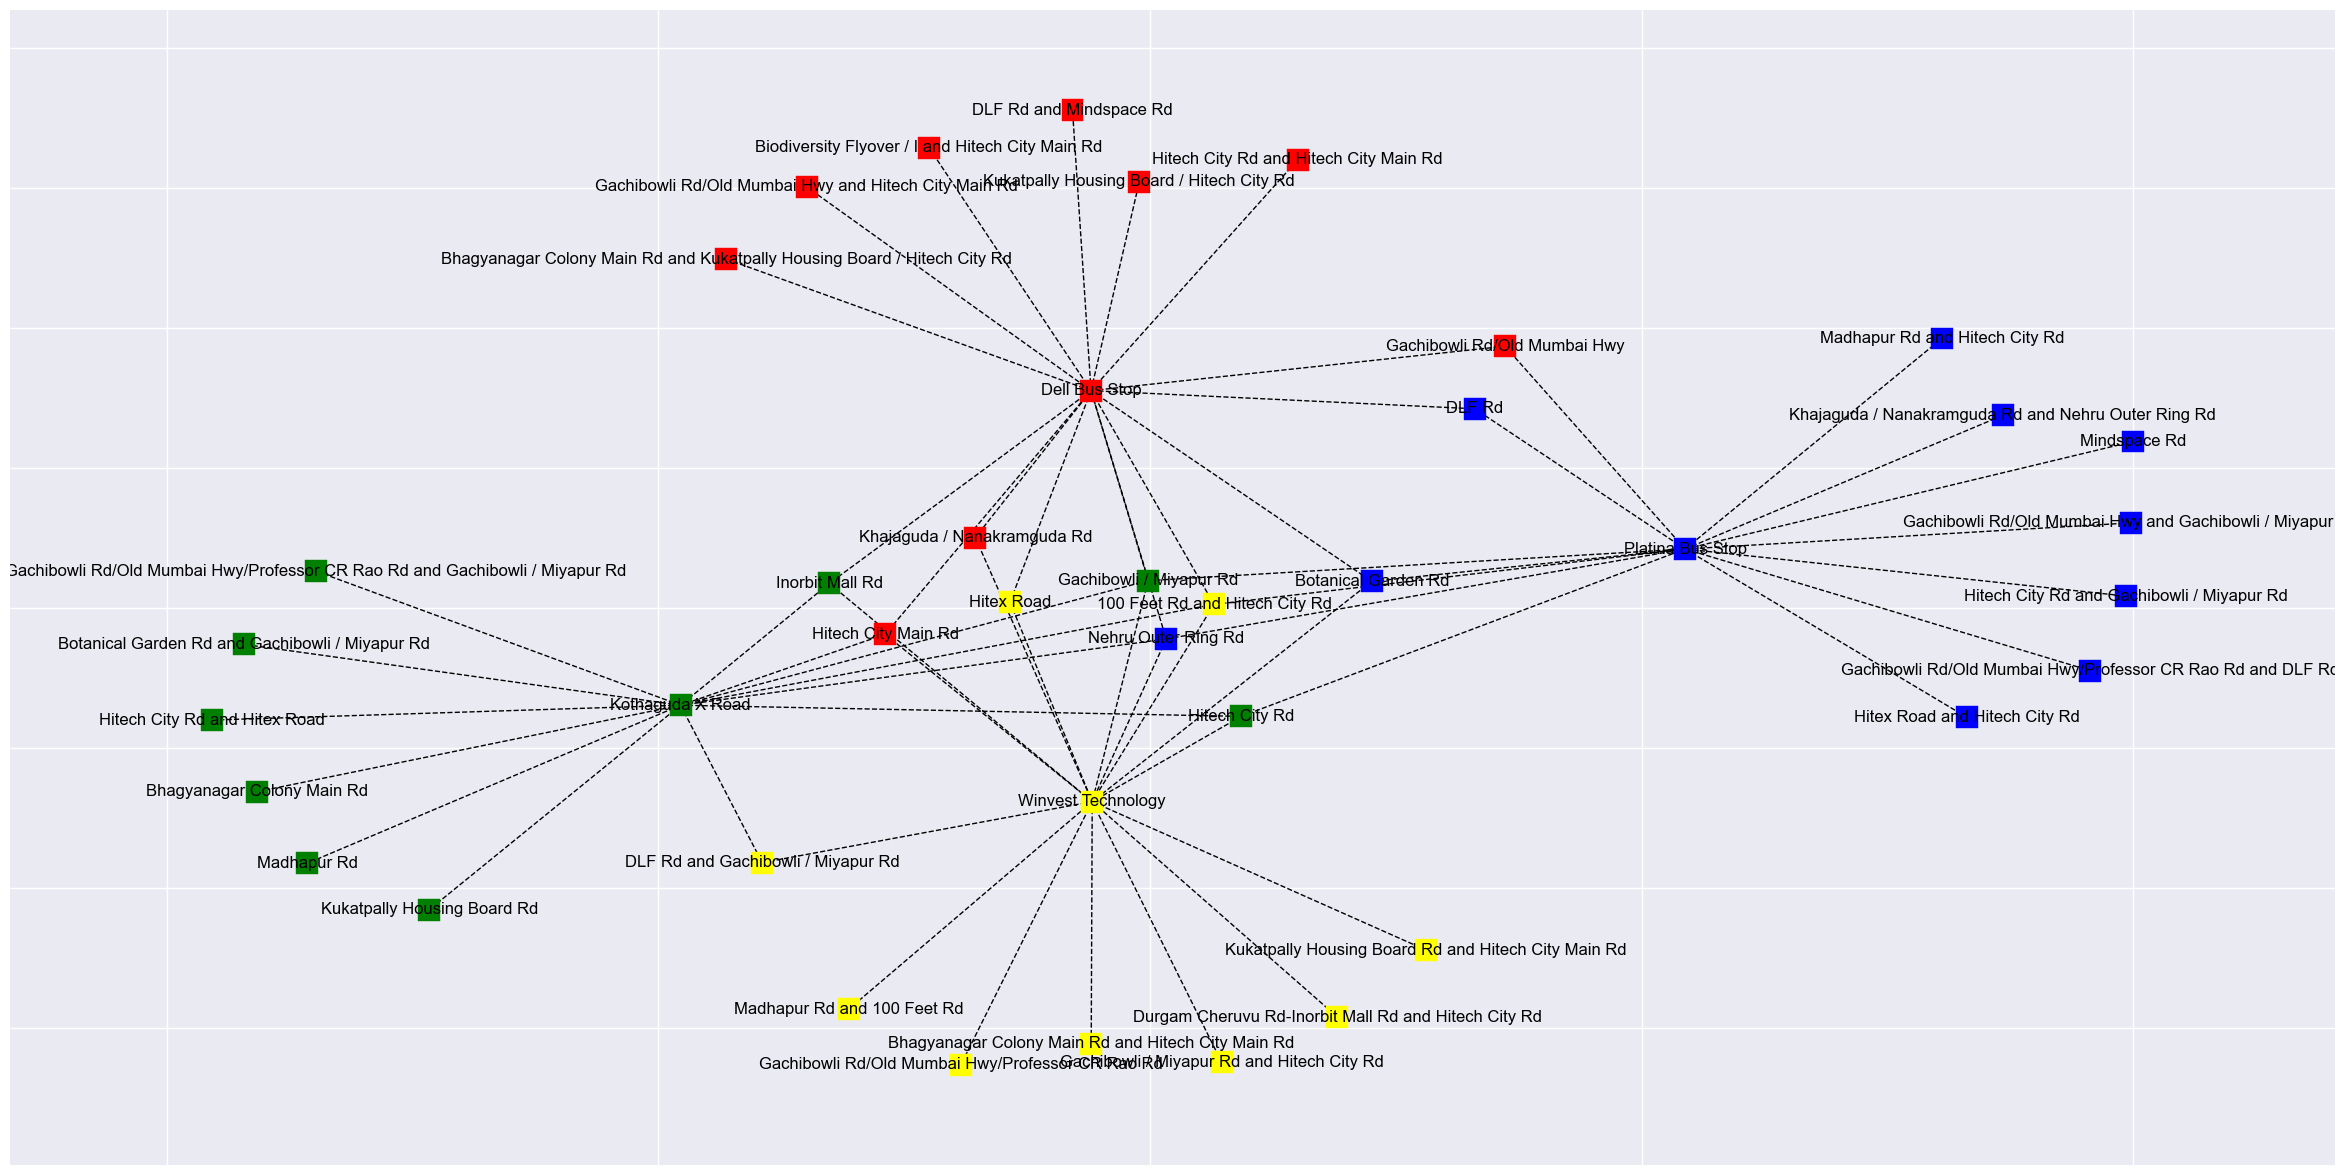

In [152]:
plt.figure(figsize = (30,15))

color_map = []
 # color the nodes according to their partition
for node in g:
  if node in partition[0]:
    color_map.append('red')
  elif node in partition[1]:
    color_map.append('green')
  elif node in partition[2]:
    color_map.append('blue')
  else:
    color_map.append('yellow')


pos = nx.spring_layout(g)


nx.draw_networkx(g, pos, partition, 
                 with_labels=True, # show name of node
                 node_size = 250,  # size of node
                 node_shape = "s", # shape of node
                 edge_color = "k", # color of node
                 style = "--", # style of edges
                 node_color = color_map) # color of partition

plt.show()

In [153]:
com_1 = nx_comm.louvain_communities(g)
#display(com_1)
print("For louvain_communities")
print()
print("Modularity: ", nx_comm.modularity(g, com_1)) # Modularity is a measure of the structure of networks or graphs which 
                                                    # measures the strength of division of a network into modules

print("Partition Quality: ", nx_comm.partition_quality(g, com_1)) 
#The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
#The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.
print("Coverage: ", nx_comm.coverage(g, com_1)) 
print("Performance: ", nx_comm.performance(g, com_1))

For louvain_communities

Modularity:  0.3769031887388682
Partition Quality:  (0.6271186440677966, 0.7865853658536586)
Coverage:  0.6271186440677966
Performance:  0.7865853658536586


### greedy_modularity_communities
Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no futher increase in modularity is possible (a maximum)

In [154]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

partition = nx_comm.greedy_modularity_communities(g)
display(partition, len(partition))

[frozenset({'Botanical Garden Rd',
            'DLF Rd',
            'Gachibowli / Miyapur Rd',
            'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
            'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
            'Hitech City Rd and Gachibowli / Miyapur Rd',
            'Hitex Road and Hitech City Rd',
            'Khajaguda / Nanakramguda Rd and Nehru Outer Ring Rd',
            'Madhapur Rd and Hitech City Rd',
            'Mindspace Rd',
            'Platina Bus Stop'}),
 frozenset({'100 Feet Rd and Hitech City Rd',
            'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd',
            'Biodiversity Flyover / I and Hitech City Main Rd',
            'DLF Rd and Mindspace Rd',
            'Dell Bus Stop',
            'Gachibowli Rd/Old Mumbai Hwy',
            'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd',
            'Hitech City Rd and Hitech City Main Rd',
            'Khajaguda / Nanakramguda Rd',
    

4

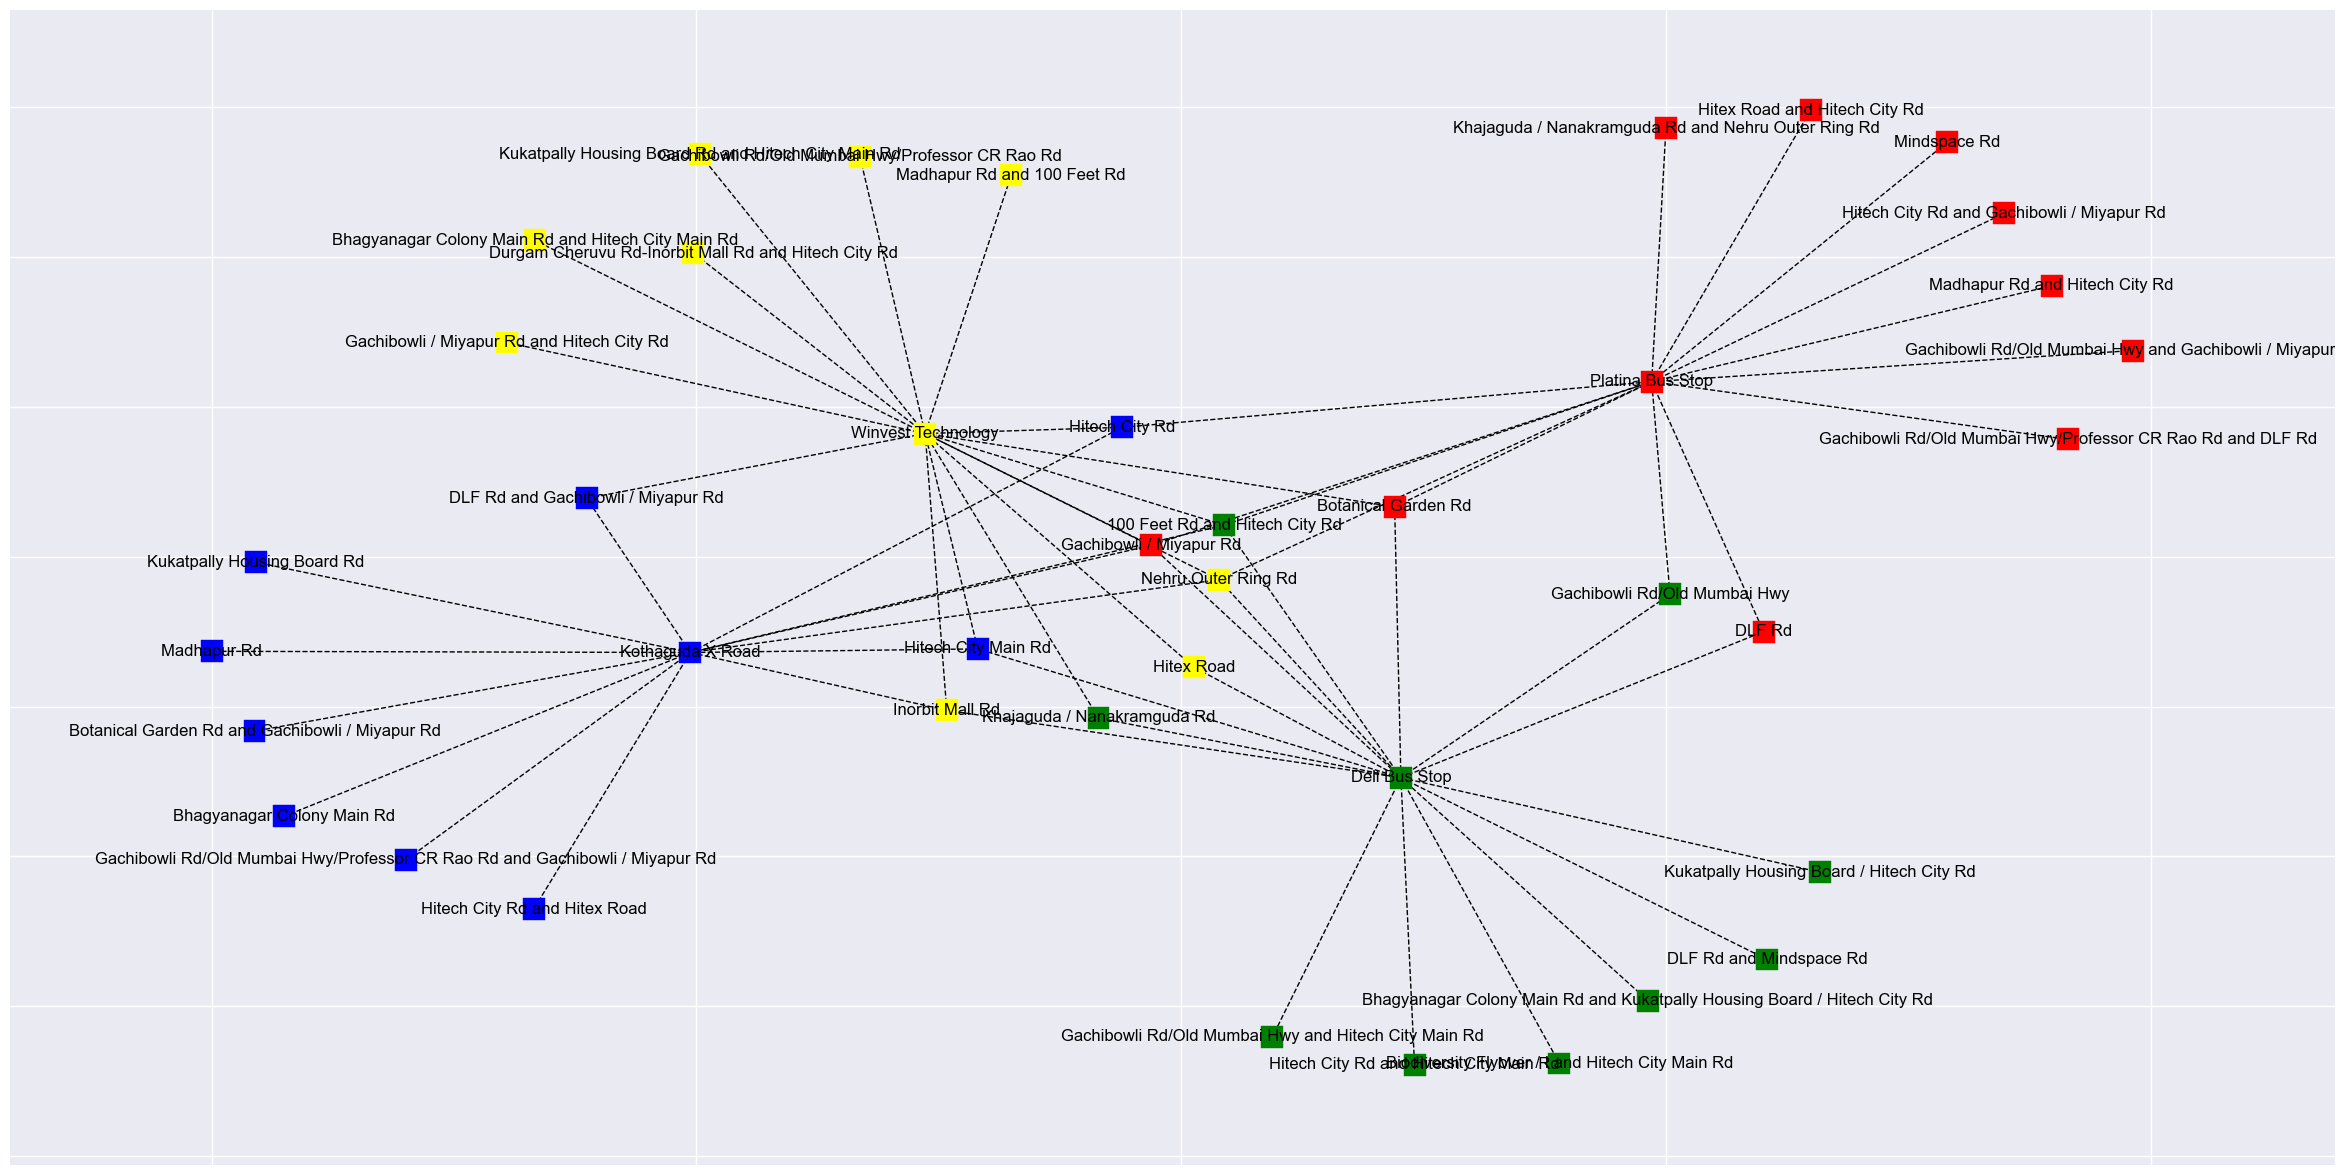

In [155]:
plt.figure(figsize = (30,15))

color_map = []
for node in g:
  if node in partition[0]:
    color_map.append('red')
  elif node in partition[1]:
    color_map.append('green')
  elif node in partition[2]:
    color_map.append('blue')
  else:
    color_map.append('yellow')


pos = nx.spring_layout(g)
# color the nodes according to their partition
nx.draw_networkx(g, pos, partition, 
                 with_labels=True, 
                 node_size = 250, 
                 node_shape = "s", 
                 edge_color = "k", 
                 style = "--", 
                 node_color = color_map)

plt.show()

In [156]:
com_2 = nx_comm.greedy_modularity_communities(g)
#display(com_2)
print("For greedy_modularity_communities")
print()
print("Modularity: ", nx_comm.modularity(g, com_2))
print("Partition Quality: ", nx_comm.partition_quality(g, com_2))
print("Coverage: ", nx_comm.coverage(g, com_2)) 
print("Performance: ", nx_comm.performance(g, com_2))

For greedy_modularity_communities

Modularity:  0.37647227808101125
Partition Quality:  (0.6271186440677966, 0.7865853658536586)
Coverage:  0.6271186440677966
Performance:  0.7865853658536586


### naive_greedy_modularity_communities

In [157]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

partition = nx_comm.naive_greedy_modularity_communities(g)
display(partition, len(partition))

[frozenset({'DLF Rd',
            'Gachibowli / Miyapur Rd',
            'Gachibowli Rd/Old Mumbai Hwy',
            'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
            'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
            'Hitech City Rd and Gachibowli / Miyapur Rd',
            'Hitex Road and Hitech City Rd',
            'Khajaguda / Nanakramguda Rd and Nehru Outer Ring Rd',
            'Madhapur Rd and Hitech City Rd',
            'Mindspace Rd',
            'Platina Bus Stop'}),
 frozenset({'100 Feet Rd and Hitech City Rd',
            'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd',
            'Biodiversity Flyover / I and Hitech City Main Rd',
            'Botanical Garden Rd',
            'DLF Rd and Mindspace Rd',
            'Dell Bus Stop',
            'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd',
            'Hitech City Rd and Hitech City Main Rd',
            'Khajaguda / Nanakramguda Rd',
    

4

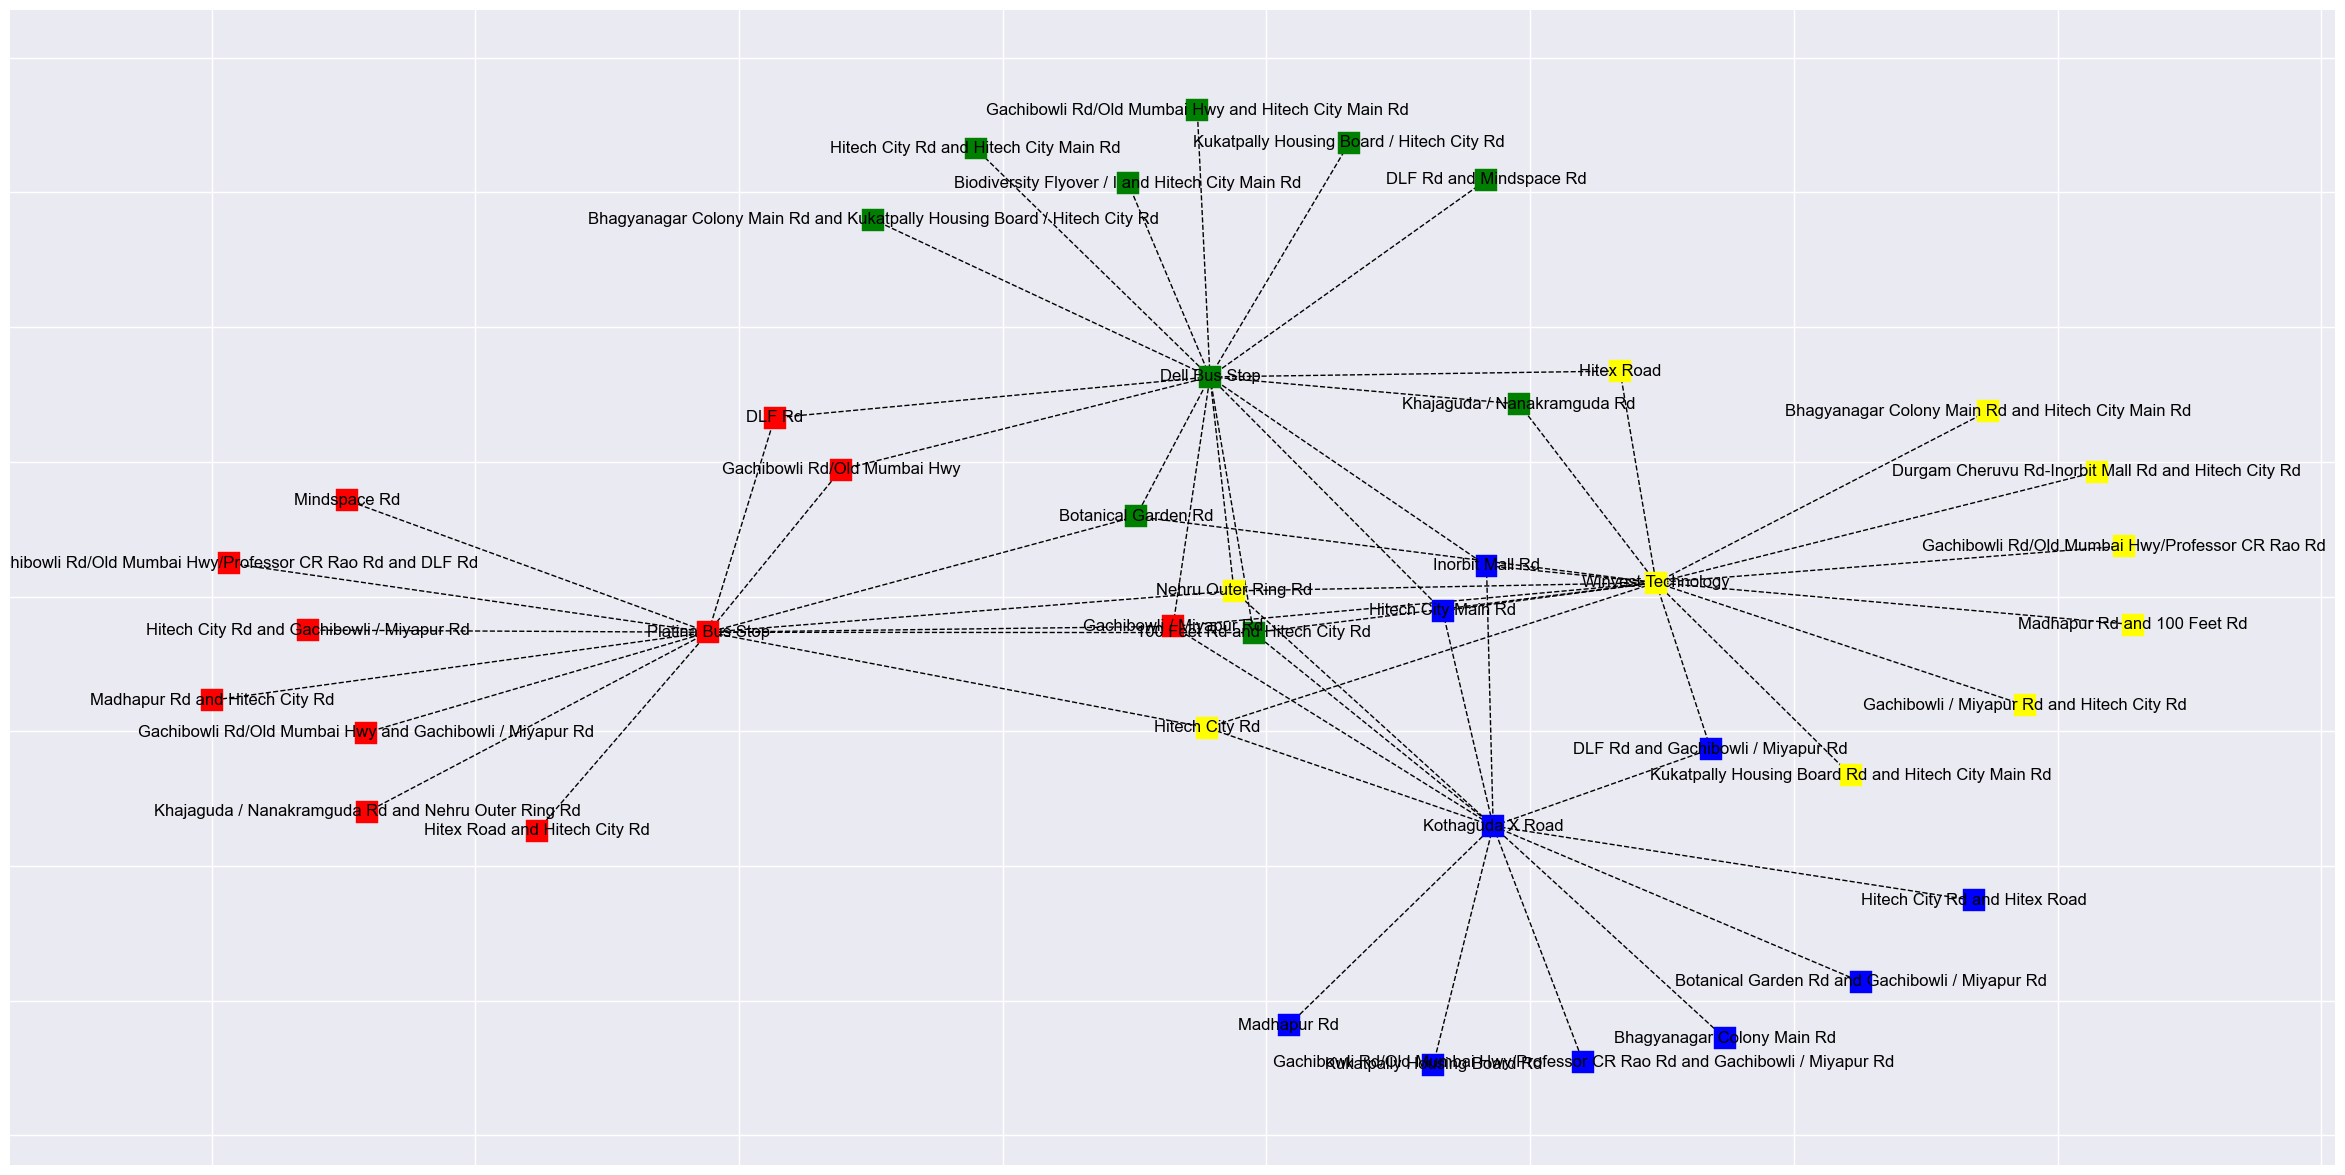

In [158]:
plt.figure(figsize = (30,15))

color_map = []
for node in g:
  if node in partition[0]:
    color_map.append('red')
  elif node in partition[1]:
    color_map.append('green')
  elif node in partition[2]:
    color_map.append('blue')
  else:
    color_map.append('yellow')

pos = nx.spring_layout(g)
# color the nodes according to their partition

nx.draw_networkx(g, pos, partition, 
                 with_labels=True, 
                 node_size = 250, 
                 node_shape = "s", 
                 edge_color = "k", 
                 style = "--", 
                 node_color = color_map)

plt.show()

In [159]:
com_3 = nx_comm.naive_greedy_modularity_communities(g)
#display(com_3)
print("For naive_greedy_modularity_communities")
print()
print("Modularity: ", nx_comm.modularity(g, com_3))
print("Partition Quality: ", nx_comm.partition_quality(g, com_3))
print("Coverage: ", nx_comm.coverage(g, com_3)) 
print("Performance: ", nx_comm.performance(g, com_3))

For naive_greedy_modularity_communities

Modularity:  0.37632864119505893
Partition Quality:  (0.6271186440677966, 0.7865853658536586)
Coverage:  0.6271186440677966
Performance:  0.7865853658536586


In [160]:
display(g.nodes())
print()
print()
display(g.edges())

NodeView(('Gachibowli / Miyapur Rd', 'Dell Bus Stop', 'Botanical Garden Rd', 'Gachibowli Rd/Old Mumbai Hwy', 'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd', 'DLF Rd and Mindspace Rd', 'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd', 'Inorbit Mall Rd', 'Hitech City Main Rd', 'Biodiversity Flyover / I and Hitech City Main Rd', 'Nehru Outer Ring Rd', 'Khajaguda / Nanakramguda Rd', 'Hitech City Rd and Hitech City Main Rd', 'Kukatpally Housing Board / Hitech City Rd', '100 Feet Rd and Hitech City Rd', 'Hitex Road', 'Kothaguda X Road', 'Botanical Garden Rd and Gachibowli / Miyapur Rd', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd', 'Bhagyanagar Colony Main Rd', 'DLF Rd and Gachibowli / Miyapur Rd', 'Madhapur Rd', 'Hitech City Rd and Hitex Road', 'Hitech City Rd', 'Kukatpally Housing Board Rd', 'Platina Bus Stop', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd', 'DLF Rd', 'Gachibowli Rd/Old Mumbai Hwy and Gachib

EdgeView([('Gachibowli / Miyapur Rd', 'Dell Bus Stop'), ('Gachibowli / Miyapur Rd', 'Kothaguda X Road'), ('Gachibowli / Miyapur Rd', 'Platina Bus Stop'), ('Gachibowli / Miyapur Rd', 'Winvest Technology'), ('Dell Bus Stop', 'Botanical Garden Rd'), ('Dell Bus Stop', 'Gachibowli Rd/Old Mumbai Hwy'), ('Dell Bus Stop', 'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd'), ('Dell Bus Stop', 'DLF Rd and Mindspace Rd'), ('Dell Bus Stop', 'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd'), ('Dell Bus Stop', 'Inorbit Mall Rd'), ('Dell Bus Stop', 'Hitech City Main Rd'), ('Dell Bus Stop', 'Biodiversity Flyover / I and Hitech City Main Rd'), ('Dell Bus Stop', 'Nehru Outer Ring Rd'), ('Dell Bus Stop', 'Khajaguda / Nanakramguda Rd'), ('Dell Bus Stop', 'Hitech City Rd and Hitech City Main Rd'), ('Dell Bus Stop', 'Kukatpally Housing Board / Hitech City Rd'), ('Dell Bus Stop', '100 Feet Rd and Hitech City Rd'), ('Dell Bus Stop', 'Hitex Road'), ('Dell Bus Stop', 'DLF Rd'), ('B

---------------------------------------

Here we evaluate modularity and partition Quality of all three community detection algorithms,  from these three algorithms we choose only one for training and testing Purpose


In [161]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(data, source = "road", target = "Destination")

######################

com_1 = nx_comm.louvain_communities(g)
#display(com_1)
print("For louvain_communities")
print("Modularity: ", nx_comm.modularity(g, com_1))
print("Partition Quality: ", nx_comm.partition_quality(g, com_1))

print("---------------------------------------------------------------")

com_2 = nx_comm.greedy_modularity_communities(g)
#display(com_2)
print("For greedy_modularity_communities")
print("Modularity: ", nx_comm.modularity(g, com_2))
print("Partition Quality: ", nx_comm.partition_quality(g, com_2))

print("---------------------------------------------------------------")

com_3 = nx_comm.naive_greedy_modularity_communities(g)
#display(com_3)
print("For naive_greedy_modularity_communities")
print("Modularity: ", nx_comm.modularity(g, com_3))
print("Partition Quality: ", nx_comm.partition_quality(g, com_3))

# Modularity is a measure of the structure of a graph, measuring the density of connections within a module or community.
# The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.

# The performance of a partition is the number of intra-community edges plus inter-community non-edges 
# divided by the total number of potential edges.


For louvain_communities
Modularity:  0.37690318873886813
Partition Quality:  (0.6271186440677966, 0.7865853658536586)
---------------------------------------------------------------
For greedy_modularity_communities
Modularity:  0.37647227808101125
Partition Quality:  (0.6271186440677966, 0.7865853658536586)
---------------------------------------------------------------
For naive_greedy_modularity_communities
Modularity:  0.37632864119505893
Partition Quality:  (0.6271186440677966, 0.7865853658536586)


louvain_communities give best modularity and partition quality result. now we select louvain_communities algorithms for further work

---------------------------------

In [162]:
data

,road,Destination,distance(meters),avg_time(minutes),speed_km_hr
0,Gachibowli / Miyapur Rd,Dell Bus Stop,4092,10,24.552000
1,Botanical Garden Rd,Dell Bus Stop,5218,14,22.362857
2,Gachibowli Rd/Old Mumbai Hwy,Dell Bus Stop,7712,14,33.051429
3,Bhagyanagar Colony Main Rd and Kukatpally Hous...,Dell Bus Stop,4057,9,27.046667
4,DLF Rd and Mindspace Rd,Dell Bus Stop,4700,12,23.500000
...,...,...,...,...,...
587,Hitex Road,Winvest Technology,3192,10,19.152000
588,100 Feet Rd and Hitech City Rd,Winvest Technology,3526,12,17.630000
589,Hitex Road,Winvest Technology,2640,9,17.600000
590,Kukatpally Housing Board Rd and Hitech City Ma...,Winvest Technology,5200,14,22.285714


In [163]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0)

display(train, test)

,road,Destination,distance(meters),avg_time(minutes),speed_km_hr
211,Madhapur Rd and 100 Feet Rd,Winvest Technology,4882,14,20.922857
45,Gachibowli Rd/Old Mumbai Hwy and Gachibowli / ...,Platina Bus Stop,4100,10,24.600000
505,Bhagyanagar Colony Main Rd and Hitech City Mai...,Winvest Technology,3889,14,16.667143
546,Hitech City Main Rd,Kothaguda X Road,7115,20,21.345000
483,Gachibowli / Miyapur Rd,Kothaguda X Road,2128,9,14.186667
...,...,...,...,...,...
277,Hitech City Rd,Platina Bus Stop,5239,18,17.463333
9,Nehru Outer Ring Rd,Dell Bus Stop,17217,24,43.042500
359,DLF Rd and Gachibowli / Miyapur Rd,Winvest Technology,3438,10,20.628000
192,Gachibowli Rd/Old Mumbai Hwy and Gachibowli / ...,Platina Bus Stop,3615,12,18.075000


,road,Destination,distance(meters),avg_time(minutes),speed_km_hr
245,Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao ...,Kothaguda X Road,5978,18,19.926667
268,Madhapur Rd and Hitech City Rd,Platina Bus Stop,6928,22,18.894545
578,Gachibowli / Miyapur Rd,Winvest Technology,5454,18,18.180000
142,Gachibowli / Miyapur Rd and Hitech City Rd,Winvest Technology,3327,9,22.180000
343,Madhapur Rd and Hitech City Rd,Platina Bus Stop,6928,16,25.980000
...,...,...,...,...,...
17,Hitex Road,Dell Bus Stop,3977,9,26.513333
533,Hitech City Main Rd,Dell Bus Stop,1607,6,16.070000
301,Botanical Garden Rd,Dell Bus Stop,5218,14,22.362857
122,Mindspace Rd,Platina Bus Stop,4427,12,22.135000


### For Train Data

In [164]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(train, source = "road", target = "Destination")

partition = nx_comm.louvain_communities(g)
display(partition, len(partition))

[{'100 Feet Rd and Hitech City Rd',
  'Bhagyanagar Colony Main Rd and Hitech City Main Rd',
  'Durgam Cheruvu Rd-Inorbit Mall Rd and Hitech City Rd',
  'Gachibowli / Miyapur Rd and Hitech City Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd',
  'Hitex Road',
  'Inorbit Mall Rd',
  'Kukatpally Housing Board Rd and Hitech City Main Rd',
  'Madhapur Rd and 100 Feet Rd',
  'Winvest Technology'},
 {'Botanical Garden Rd',
  'DLF Rd',
  'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
  'Hitech City Rd',
  'Hitech City Rd and Gachibowli / Miyapur Rd',
  'Hitex Road and Hitech City Rd',
  'Khajaguda / Nanakramguda Rd and Nehru Outer Ring Rd',
  'Madhapur Rd and Hitech City Rd',
  'Mindspace Rd',
  'Platina Bus Stop'},
 {'Bhagyanagar Colony Main Rd',
  'Botanical Garden Rd and Gachibowli / Miyapur Rd',
  'DLF Rd and Gachibowli / Miyapur Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / M

4

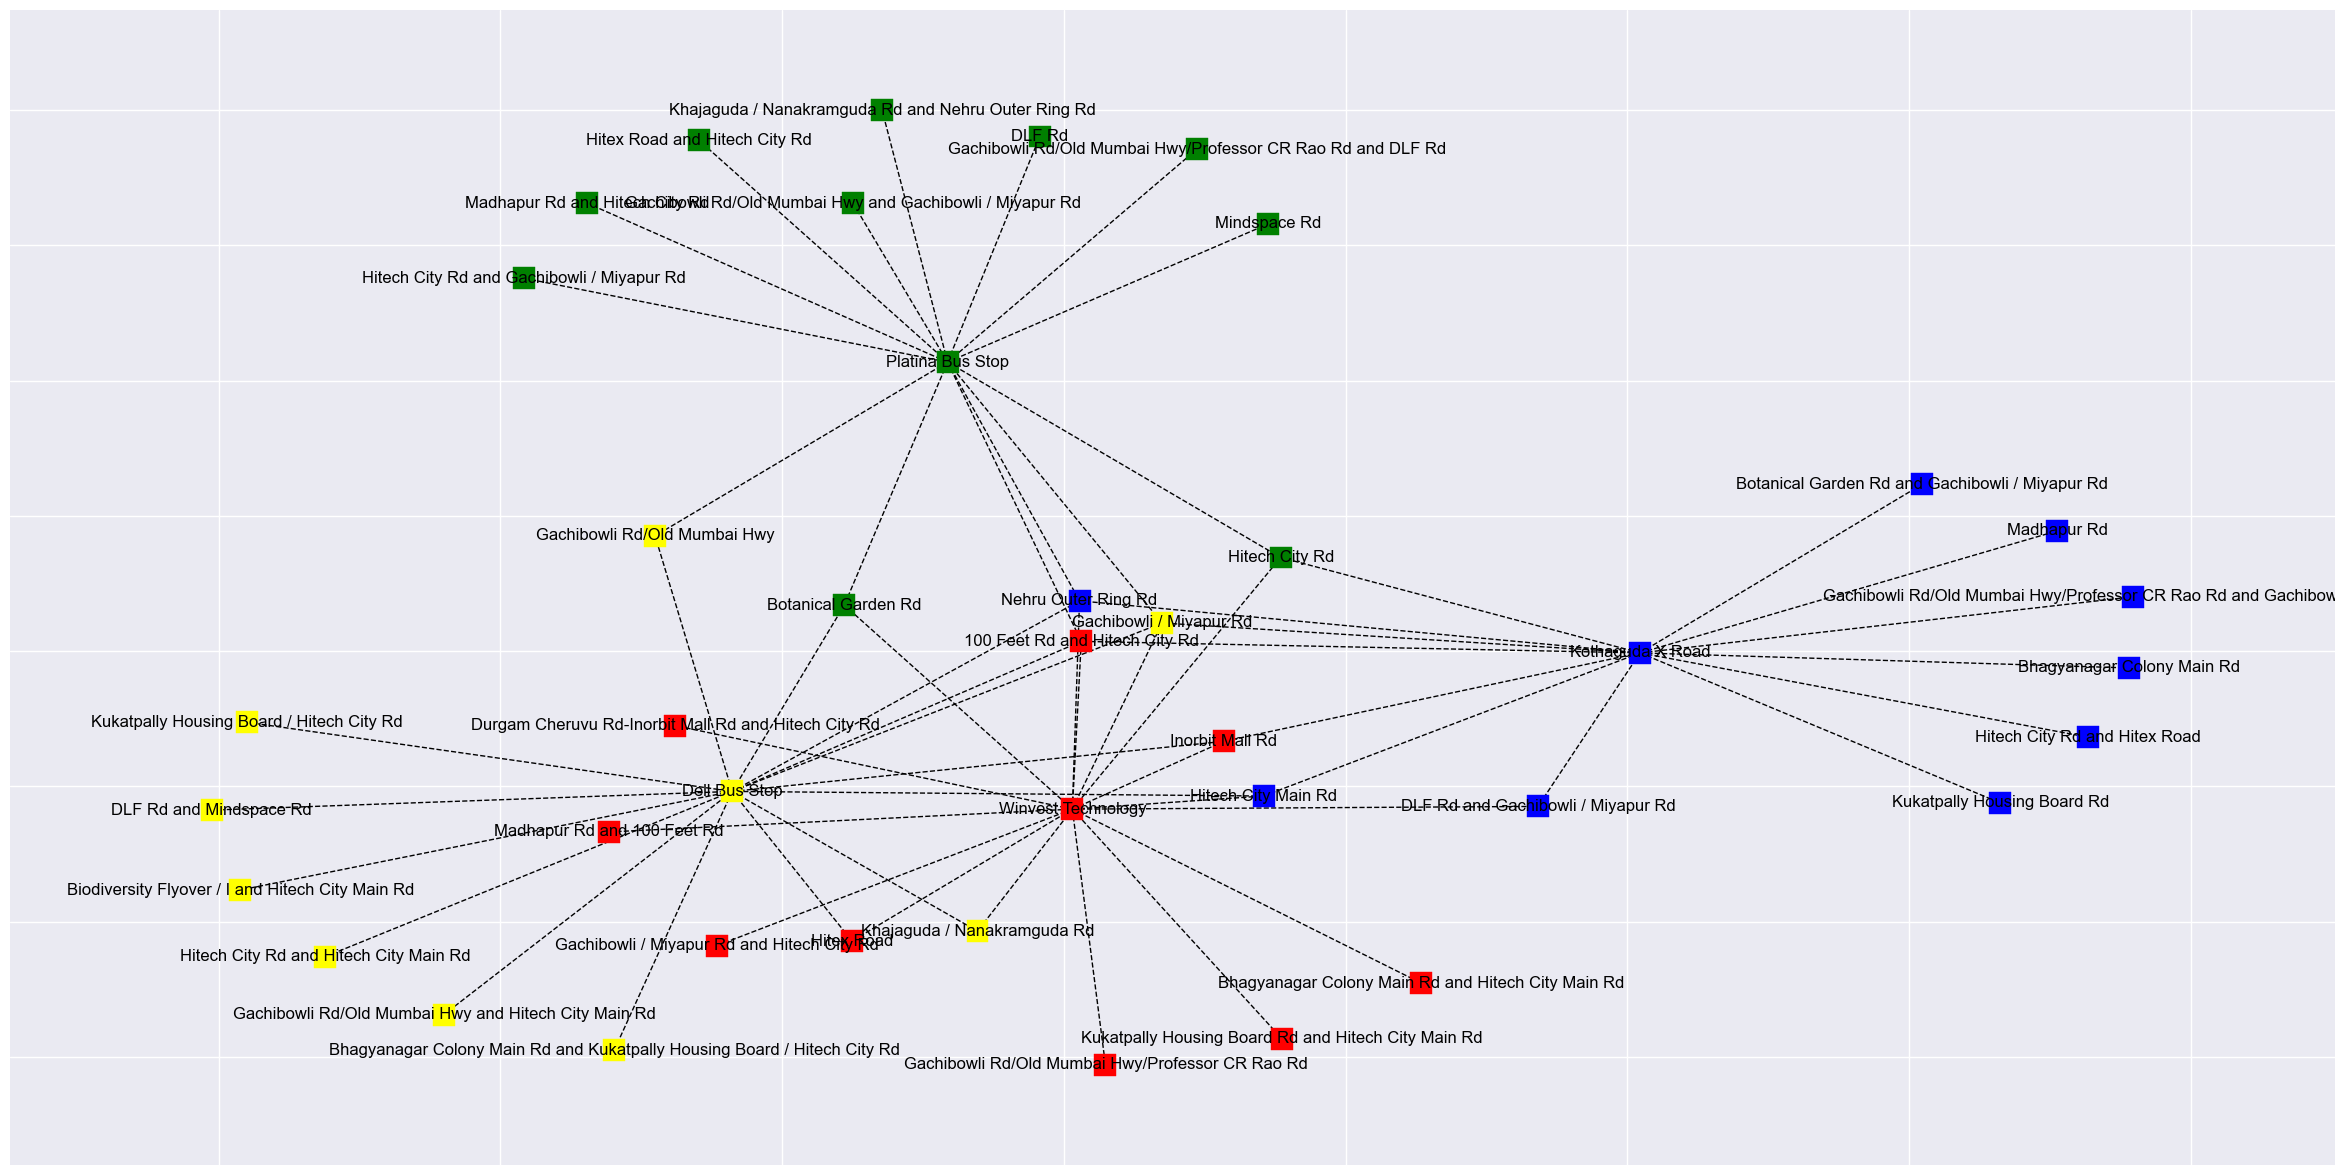

In [165]:
plt.figure(figsize = (30,15))

color_map = []
 # color the nodes according to their partition
for node in g:
  if node in partition[0]:
    color_map.append('red')
  elif node in partition[1]:
    color_map.append('green')
  elif node in partition[2]:
    color_map.append('blue')
  else:
    color_map.append('yellow')


pos = nx.spring_layout(g)


nx.draw_networkx(g, pos, partition, 
                 with_labels=True, 
                 node_size = 250, 
                 node_shape = "s", 
                 edge_color = "k", 
                 style = "--", 
                 node_color = color_map)

plt.show()

In [166]:
com_1 = nx_comm.louvain_communities(g)
#display(com_1)
print("For louvain_communities --> Train Data")
print()
print("Modularity: ", nx_comm.modularity(g, com_1))
print("Partition Quality: ", nx_comm.partition_quality(g, com_1))
print("Coverage: ", nx_comm.coverage(g, com_1)) 
print("Performance: ", nx_comm.performance(g, com_1))

For louvain_communities --> Train Data

Modularity:  0.3877824019024971
Partition Quality:  (0.6379310344827587, 0.7878048780487805)
Coverage:  0.6379310344827587
Performance:  0.7878048780487805


In [167]:
display(nx.info(g))
display(g.nodes())
print("----------------------------------------------------------------------------------")
display(g.edges())

'Graph with 41 nodes and 58 edges'

NodeView(('Madhapur Rd and 100 Feet Rd', 'Winvest Technology', 'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd', 'Platina Bus Stop', 'Bhagyanagar Colony Main Rd and Hitech City Main Rd', 'Hitech City Main Rd', 'Kothaguda X Road', 'Gachibowli / Miyapur Rd', 'Hitech City Rd', 'Kukatpally Housing Board / Hitech City Rd', 'Dell Bus Stop', 'Madhapur Rd', 'Botanical Garden Rd', '100 Feet Rd and Hitech City Rd', 'Bhagyanagar Colony Main Rd', 'DLF Rd and Mindspace Rd', 'Hitex Road', 'Inorbit Mall Rd', 'Hitech City Rd and Hitech City Main Rd', 'Kukatpally Housing Board Rd and Hitech City Main Rd', 'Nehru Outer Ring Rd', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd', 'Kukatpally Housing Board Rd', 'Botanical Garden Rd and Gachibowli / Miyapur Rd', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd', 'Khajaguda / Nanakramguda Rd', 'DLF Rd and Gachibowli / Miyapur Rd', 'Biodiversity Flyover / I and Hitech City Main Rd', 'Hitech City Rd and Gachibowli / Miy

----------------------------------------------------------------------------------


EdgeView([('Madhapur Rd and 100 Feet Rd', 'Winvest Technology'), ('Winvest Technology', 'Bhagyanagar Colony Main Rd and Hitech City Main Rd'), ('Winvest Technology', 'Hitech City Rd'), ('Winvest Technology', 'Hitex Road'), ('Winvest Technology', 'Kukatpally Housing Board Rd and Hitech City Main Rd'), ('Winvest Technology', '100 Feet Rd and Hitech City Rd'), ('Winvest Technology', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd'), ('Winvest Technology', 'Khajaguda / Nanakramguda Rd'), ('Winvest Technology', 'DLF Rd and Gachibowli / Miyapur Rd'), ('Winvest Technology', 'Gachibowli / Miyapur Rd'), ('Winvest Technology', 'Inorbit Mall Rd'), ('Winvest Technology', 'Nehru Outer Ring Rd'), ('Winvest Technology', 'Hitech City Main Rd'), ('Winvest Technology', 'Botanical Garden Rd'), ('Winvest Technology', 'Gachibowli / Miyapur Rd and Hitech City Rd'), ('Winvest Technology', 'Durgam Cheruvu Rd-Inorbit Mall Rd and Hitech City Rd'), ('Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd', '

### For Test Data

In [168]:
g = nx.karate_club_graph()
g = nx.from_pandas_edgelist(test, source = "road", target = "Destination")

partition = nx_comm.louvain_communities(g)
display(partition, len(partition))

[{'100 Feet Rd and Hitech City Rd',
  'Bhagyanagar Colony Main Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd',
  'Hitech City Main Rd',
  'Hitech City Rd and Hitex Road',
  'Inorbit Mall Rd',
  'Kothaguda X Road',
  'Kukatpally Housing Board Rd',
  'Madhapur Rd'},
 {'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd',
  'Hitech City Rd',
  'Hitech City Rd and Gachibowli / Miyapur Rd',
  'Hitex Road and Hitech City Rd',
  'Khajaguda / Nanakramguda Rd and Nehru Outer Ring Rd',
  'Madhapur Rd and Hitech City Rd',
  'Mindspace Rd',
  'Nehru Outer Ring Rd',
  'Platina Bus Stop'},
 {'Botanical Garden Rd',
  'DLF Rd and Gachibowli / Miyapur Rd',
  'Gachibowli / Miyapur Rd and Hitech City Rd',
  'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd',
  'Hitex Road',
  'Khajaguda / Nanakramguda Rd',
  'Kukatpally Housing Board Rd and Hitech City Main Rd',
  'Madhapur Rd and 100 Feet Rd',
 

4

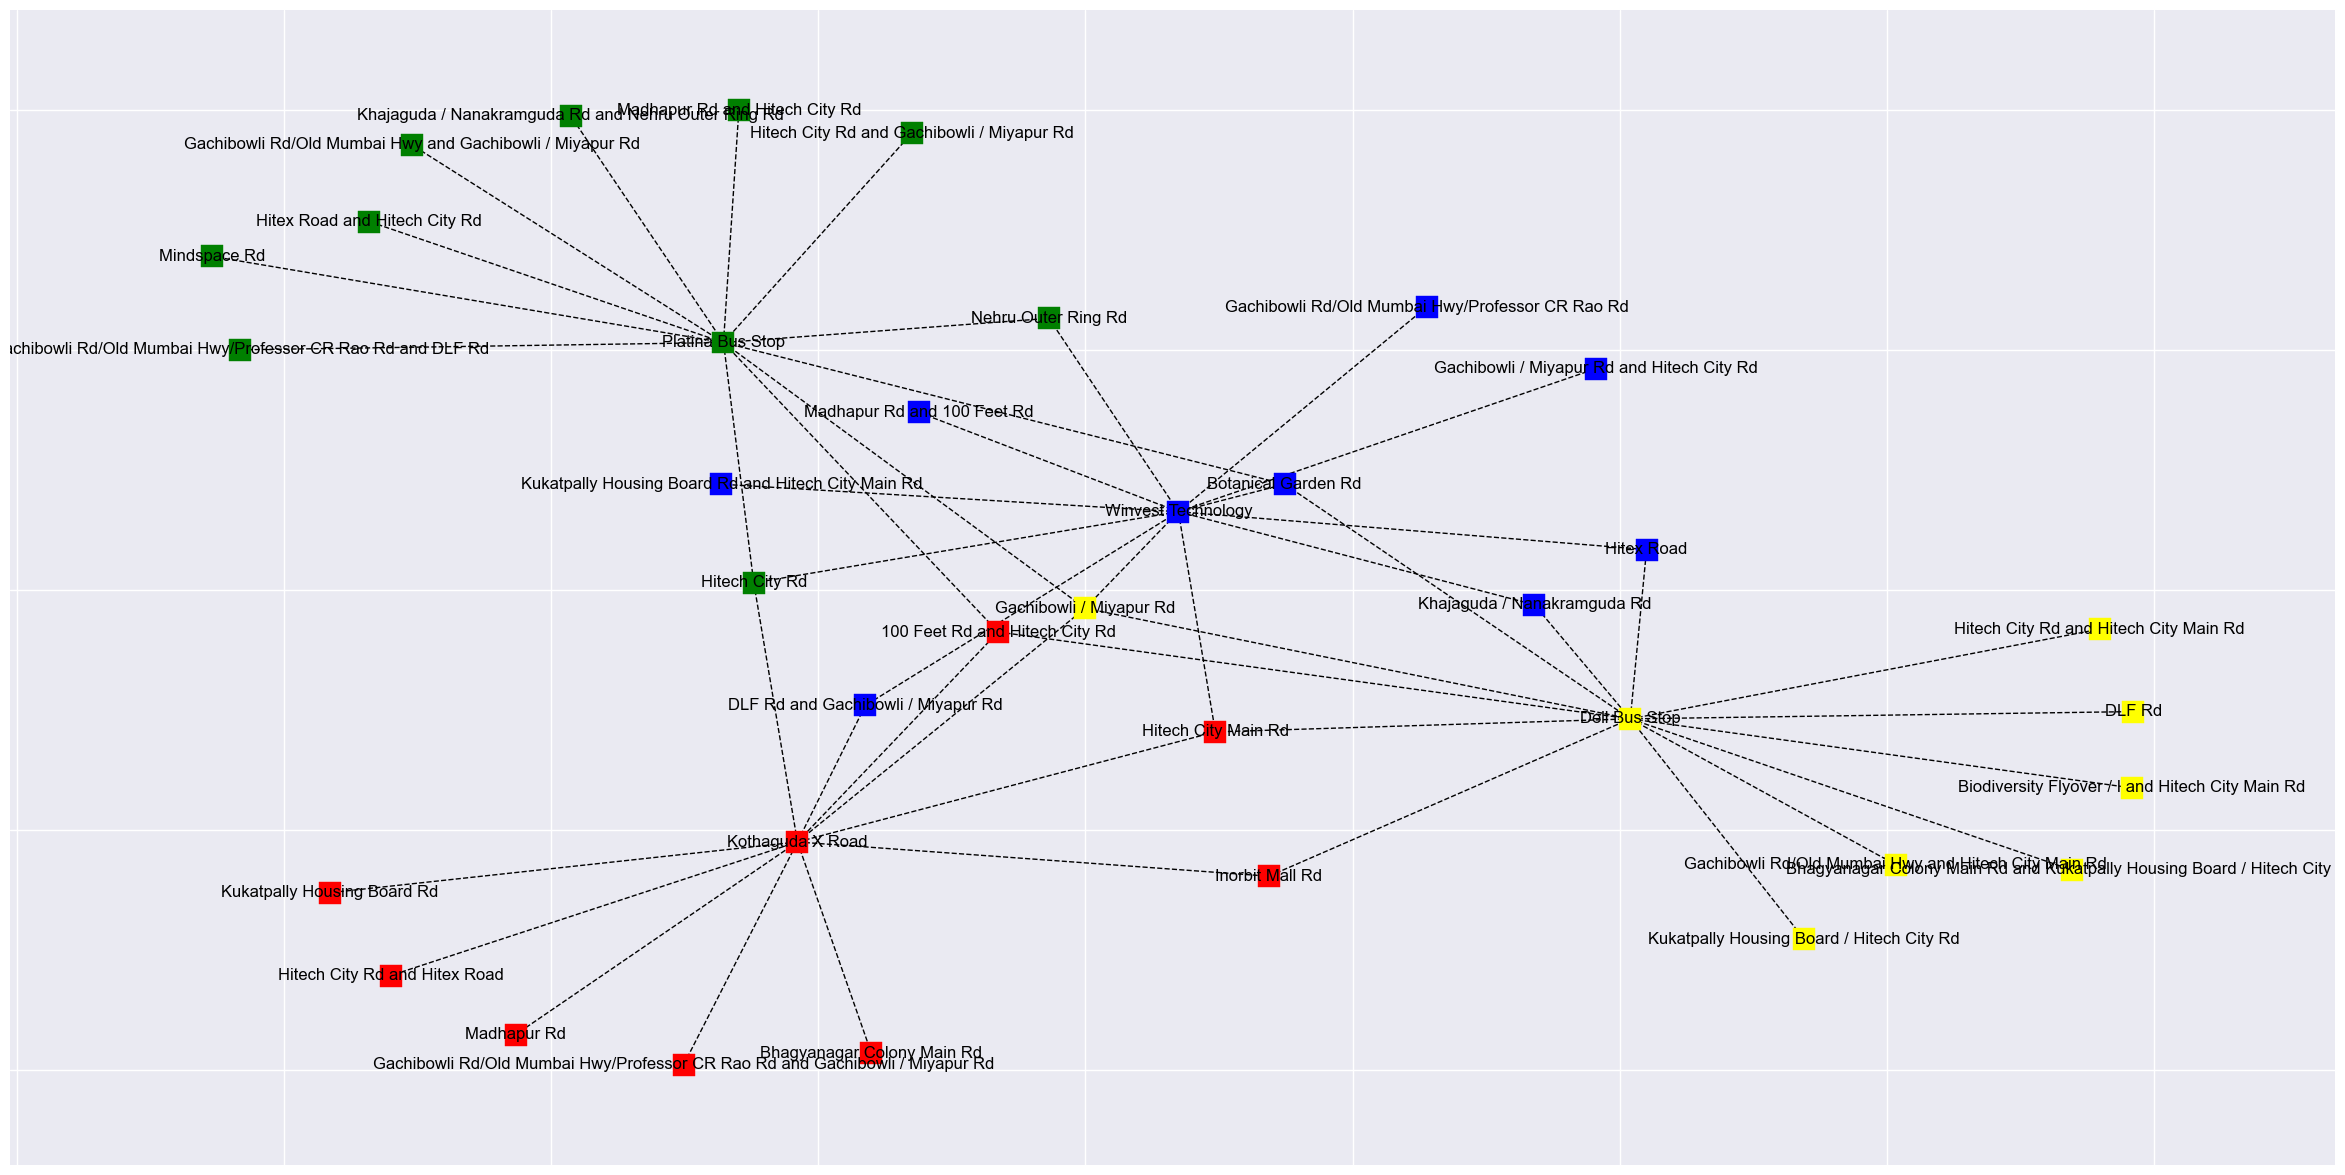

In [169]:
plt.figure(figsize = (30,15))

color_map = []
 # color the nodes according to their partition
for node in g:
  if node in partition[0]:
    color_map.append('red')
  elif node in partition[1]:
    color_map.append('green')
  elif node in partition[2]:
    color_map.append('blue')
  else:
    color_map.append('yellow')


pos = nx.spring_layout(g)


nx.draw_networkx(g, pos, partition, 
                 with_labels=True, 
                 node_size = 250, 
                 node_shape = "s", 
                 edge_color = "k", 
                 style = "--", 
                 node_color = color_map)

plt.show()

In [170]:
com_1 = nx_comm.louvain_communities(g)
#display(com_1)
print("For louvain_communities --> Test Data")
print()
print("Modularity: ", nx_comm.modularity(g, com_1))
print("Partition Quality: ", nx_comm.partition_quality(g, com_1))
print("Coverage: ", nx_comm.coverage(g, com_1)) 
print("Performance: ", nx_comm.performance(g, com_1))

For louvain_communities --> Test Data

Modularity:  0.41666666666666663
Partition Quality:  (0.6666666666666666, 0.7952380952380952)
Coverage:  0.6666666666666666
Performance:  0.7952380952380952


In [171]:
display(nx.info(g))
display(g.nodes())
print("----------------------------------------------------------------------------------")
display(g.edges())

'Graph with 36 nodes and 48 edges'

NodeView(('Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd', 'Kothaguda X Road', 'Madhapur Rd and Hitech City Rd', 'Platina Bus Stop', 'Gachibowli / Miyapur Rd', 'Winvest Technology', 'Gachibowli / Miyapur Rd and Hitech City Rd', 'Inorbit Mall Rd', 'Dell Bus Stop', 'Mindspace Rd', 'Hitech City Rd', 'Khajaguda / Nanakramguda Rd', 'Bhagyanagar Colony Main Rd and Kukatpally Housing Board / Hitech City Rd', 'Gachibowli Rd/Old Mumbai Hwy and Hitech City Main Rd', 'Hitex Road', 'Hitech City Rd and Hitech City Main Rd', 'Hitech City Main Rd', 'Nehru Outer Ring Rd', 'Hitech City Rd and Gachibowli / Miyapur Rd', 'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd', '100 Feet Rd and Hitech City Rd', 'Botanical Garden Rd', 'Bhagyanagar Colony Main Rd', 'Kukatpally Housing Board Rd and Hitech City Main Rd', 'DLF Rd', 'Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and DLF Rd', 'Biodiversity Flyover / I and Hitech City Main Rd', 'Khajaguda / Nanakramguda Rd and 

----------------------------------------------------------------------------------


EdgeView([('Gachibowli Rd/Old Mumbai Hwy/Professor CR Rao Rd and Gachibowli / Miyapur Rd', 'Kothaguda X Road'), ('Kothaguda X Road', 'Inorbit Mall Rd'), ('Kothaguda X Road', 'Bhagyanagar Colony Main Rd'), ('Kothaguda X Road', 'Gachibowli / Miyapur Rd'), ('Kothaguda X Road', '100 Feet Rd and Hitech City Rd'), ('Kothaguda X Road', 'Hitech City Rd'), ('Kothaguda X Road', 'Hitech City Rd and Hitex Road'), ('Kothaguda X Road', 'Kukatpally Housing Board Rd'), ('Kothaguda X Road', 'DLF Rd and Gachibowli / Miyapur Rd'), ('Kothaguda X Road', 'Hitech City Main Rd'), ('Kothaguda X Road', 'Madhapur Rd'), ('Madhapur Rd and Hitech City Rd', 'Platina Bus Stop'), ('Platina Bus Stop', 'Mindspace Rd'), ('Platina Bus Stop', 'Hitech City Rd'), ('Platina Bus Stop', 'Hitech City Rd and Gachibowli / Miyapur Rd'), ('Platina Bus Stop', 'Gachibowli Rd/Old Mumbai Hwy and Gachibowli / Miyapur Rd'), ('Platina Bus Stop', 'Botanical Garden Rd'), ('Platina Bus Stop', 'Nehru Outer Ring Rd'), ('Platina Bus Stop', 'Gach

------------------------------

# Conclusion

Here we select louvain_communities algorithms for our model because it gives best modularity and partition quality result in training and testing.